# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer ,KNNImputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import layers

# Load Data

In [2]:
data = pd.read_csv('E:\\dataset\\titanic\\train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Hndling missing Value

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here I found 

-in Cabin 204 non-null in training data then must drop 'Cabin' columns

-in Embarced 889 non-null just 2 Nulls ,I will drop

-in Age 714 non-null , I will impute with SimpleImputer 


In [5]:
data.drop('Cabin' , axis=1 , inplace=True)

In [6]:
imputer=KNNImputer(n_neighbors=10)
data['Age']=imputer.fit_transform(data[['Age']])
data.dropna(inplace=True)
print(data.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


here i tried to fill with simpler imputer but bad result

In [7]:
'''imputer=SimpleImputer()
data['Age']=imputer.fit_transform(data[['Age']])
data.dropna(inplace=True)
data.isna().sum()'''

"imputer=SimpleImputer()\ndata['Age']=imputer.fit_transform(data[['Age']])\ndata.dropna(inplace=True)\ndata.isna().sum()"

In [8]:
data.shape

(889, 11)

# Extract Information

In [9]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

Here i found the title of each one 

In [10]:
data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [11]:
data['TicketGroupSize']=data.groupby('Ticket')['Ticket'].transform('count')
data['TicketGroupSize'].unique()

array([1, 2, 4, 3, 7, 5, 6], dtype=int64)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,TicketGroupSize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1


Drop the columns

In [13]:
data=data.drop(['PassengerId','Ticket','Name'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketGroupSize
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1


# Encoding

In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketGroupSize
0,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,1


In [15]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
data['Sex'] = [1 if sex == 'male' else 0 for sex in data['Sex'] ] 
data['Embarked'] = [0 if emb == 'S' else 1 if emb == 'C' else 2 for emb in data['Embarked'] ] 
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketGroupSize
0,0,3,1,22.0,1,0,7.2500,0,Mr,1
1,1,1,0,38.0,1,0,71.2833,1,Mrs,1
2,1,3,0,26.0,0,0,7.9250,0,Miss,1
3,1,1,0,35.0,1,0,53.1000,0,Mrs,2
4,0,3,1,35.0,0,0,8.0500,0,Mr,1


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder ()
data ['Title']= encoder.fit_transform(data['Title'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketGroupSize
0,0,3,1,22.0,1,0,7.2500,0,12,1
1,1,1,0,38.0,1,0,71.2833,1,13,1
2,1,3,0,26.0,0,0,7.9250,0,9,1
3,1,1,0,35.0,1,0,53.1000,0,13,2
4,0,3,1,35.0,0,0,8.0500,0,12,1


In [19]:
# data['Sex'] = [1 if sex == 'male' else 0 for sex in data['Sex'] ] 
# test_data['Sex'] = [1 if sex == 'male' else 0 for sex in test_data['Sex'] ] 
# data['Embarked'] = [0 if emb == 'S' else 1 if emb == 'C' else 2 for emb in data['Embarked'] ] 
# test_data['Embarked'] = [0 if emb == 'S' else 1 if emb == 'C' else 2 for emb in test_data['Embarked'] ] 
# data=pd.get_dummies(data,columns=['Title'],drop_first=True)
# test_data=pd.get_dummies(test_data,columns=['Title'],drop_first=True)
# data.head()

# Check Duplicates


In [20]:
duplicates = data[data.duplicated()]
data[data.duplicated()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketGroupSize
47,1,3,0,29.699118,0,0,7.7500,2,9,1
76,0,3,1,29.699118,0,0,7.8958,0,12,1
77,0,3,1,29.699118,0,0,8.0500,0,12,1
87,0,3,1,29.699118,0,0,8.0500,0,12,1
95,0,3,1,29.699118,0,0,8.0500,0,12,1
...,...,...,...,...,...,...,...,...,...,...
863,0,3,0,29.699118,8,2,69.5500,0,9,7
870,0,3,1,26.000000,0,0,7.8958,0,12,1
877,0,3,1,19.000000,0,0,7.8958,0,12,1
878,0,3,1,29.699118,0,0,7.8958,0,12,1


In [21]:
data.drop_duplicates(inplace=True)

# Check Balance

In [22]:
data['Survived'].value_counts()

Survived
0    466
1    325
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

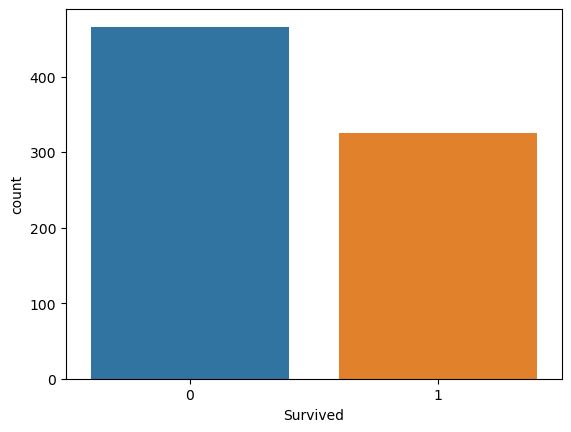

In [23]:
sns.countplot(x='Survived',data=data)

# Correlation

In [24]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'TicketGroupSize'],
      dtype='object')

In [25]:
data.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,TicketGroupSize
Survived,1.000000,-0.331985,-0.517096,-0.084048,-0.041388,0.068392,0.243415,0.081819,-0.168193,0.012190
Pclass,-0.331985,1.000000,0.112139,-0.332997,0.091895,0.038266,-0.549401,0.018286,0.042396,0.006370
Sex,-0.517096,0.112139,1.000000,0.098667,-0.087514,-0.232233,-0.164645,-0.096421,0.217822,-0.137022
Age,-0.084048,-0.332997,0.098667,1.000000,-0.268670,-0.185226,0.086809,0.010531,0.286130,-0.243106
SibSp,-0.041388,0.091895,-0.087514,-0.268670,1.000000,0.383767,0.137428,-0.042889,-0.188157,0.638109
Parch,0.068392,0.038266,-0.232233,-0.185226,0.383767,1.000000,0.195339,-0.072401,-0.104197,0.588351
Fare,0.243415,-0.549401,-0.164645,0.086809,0.137428,0.195339,1.000000,0.086560,-0.077789,0.332740
Embarked,0.081819,0.018286,-0.096421,0.010531,-0.042889,-0.072401,0.086560,1.000000,-0.100287,-0.060594
Title,-0.168193,0.042396,0.217822,0.286130,-0.188157,-0.104197,-0.077789,-0.100287,1.000000,-0.164793
TicketGroupSize,0.012190,0.006370,-0.137022,-0.243106,0.638109,0.588351,0.332740,-0.060594,-0.164793,1.000000


<Axes: >

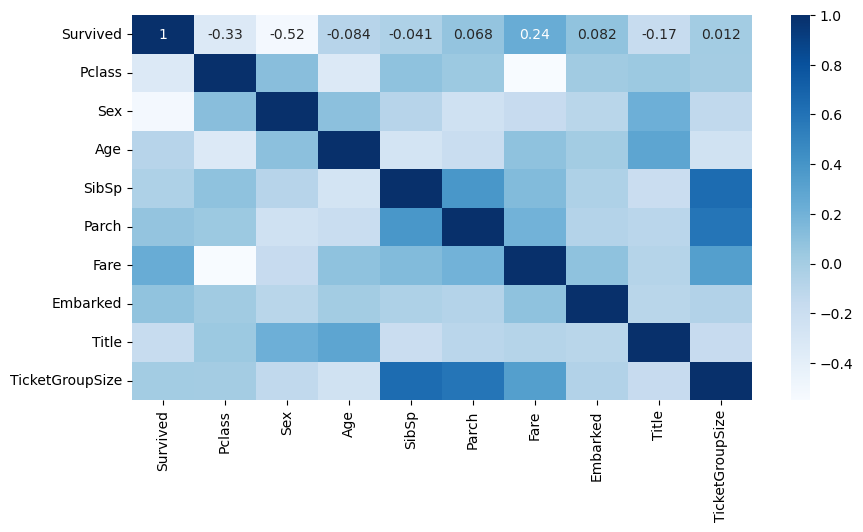

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True , cmap='Blues')

I found that ['TicketGroupSize', 'Parch','SibSp'] not affect

In [27]:
data.drop(['TicketGroupSize', 'Parch','SibSp'],inplace=True,axis=1)

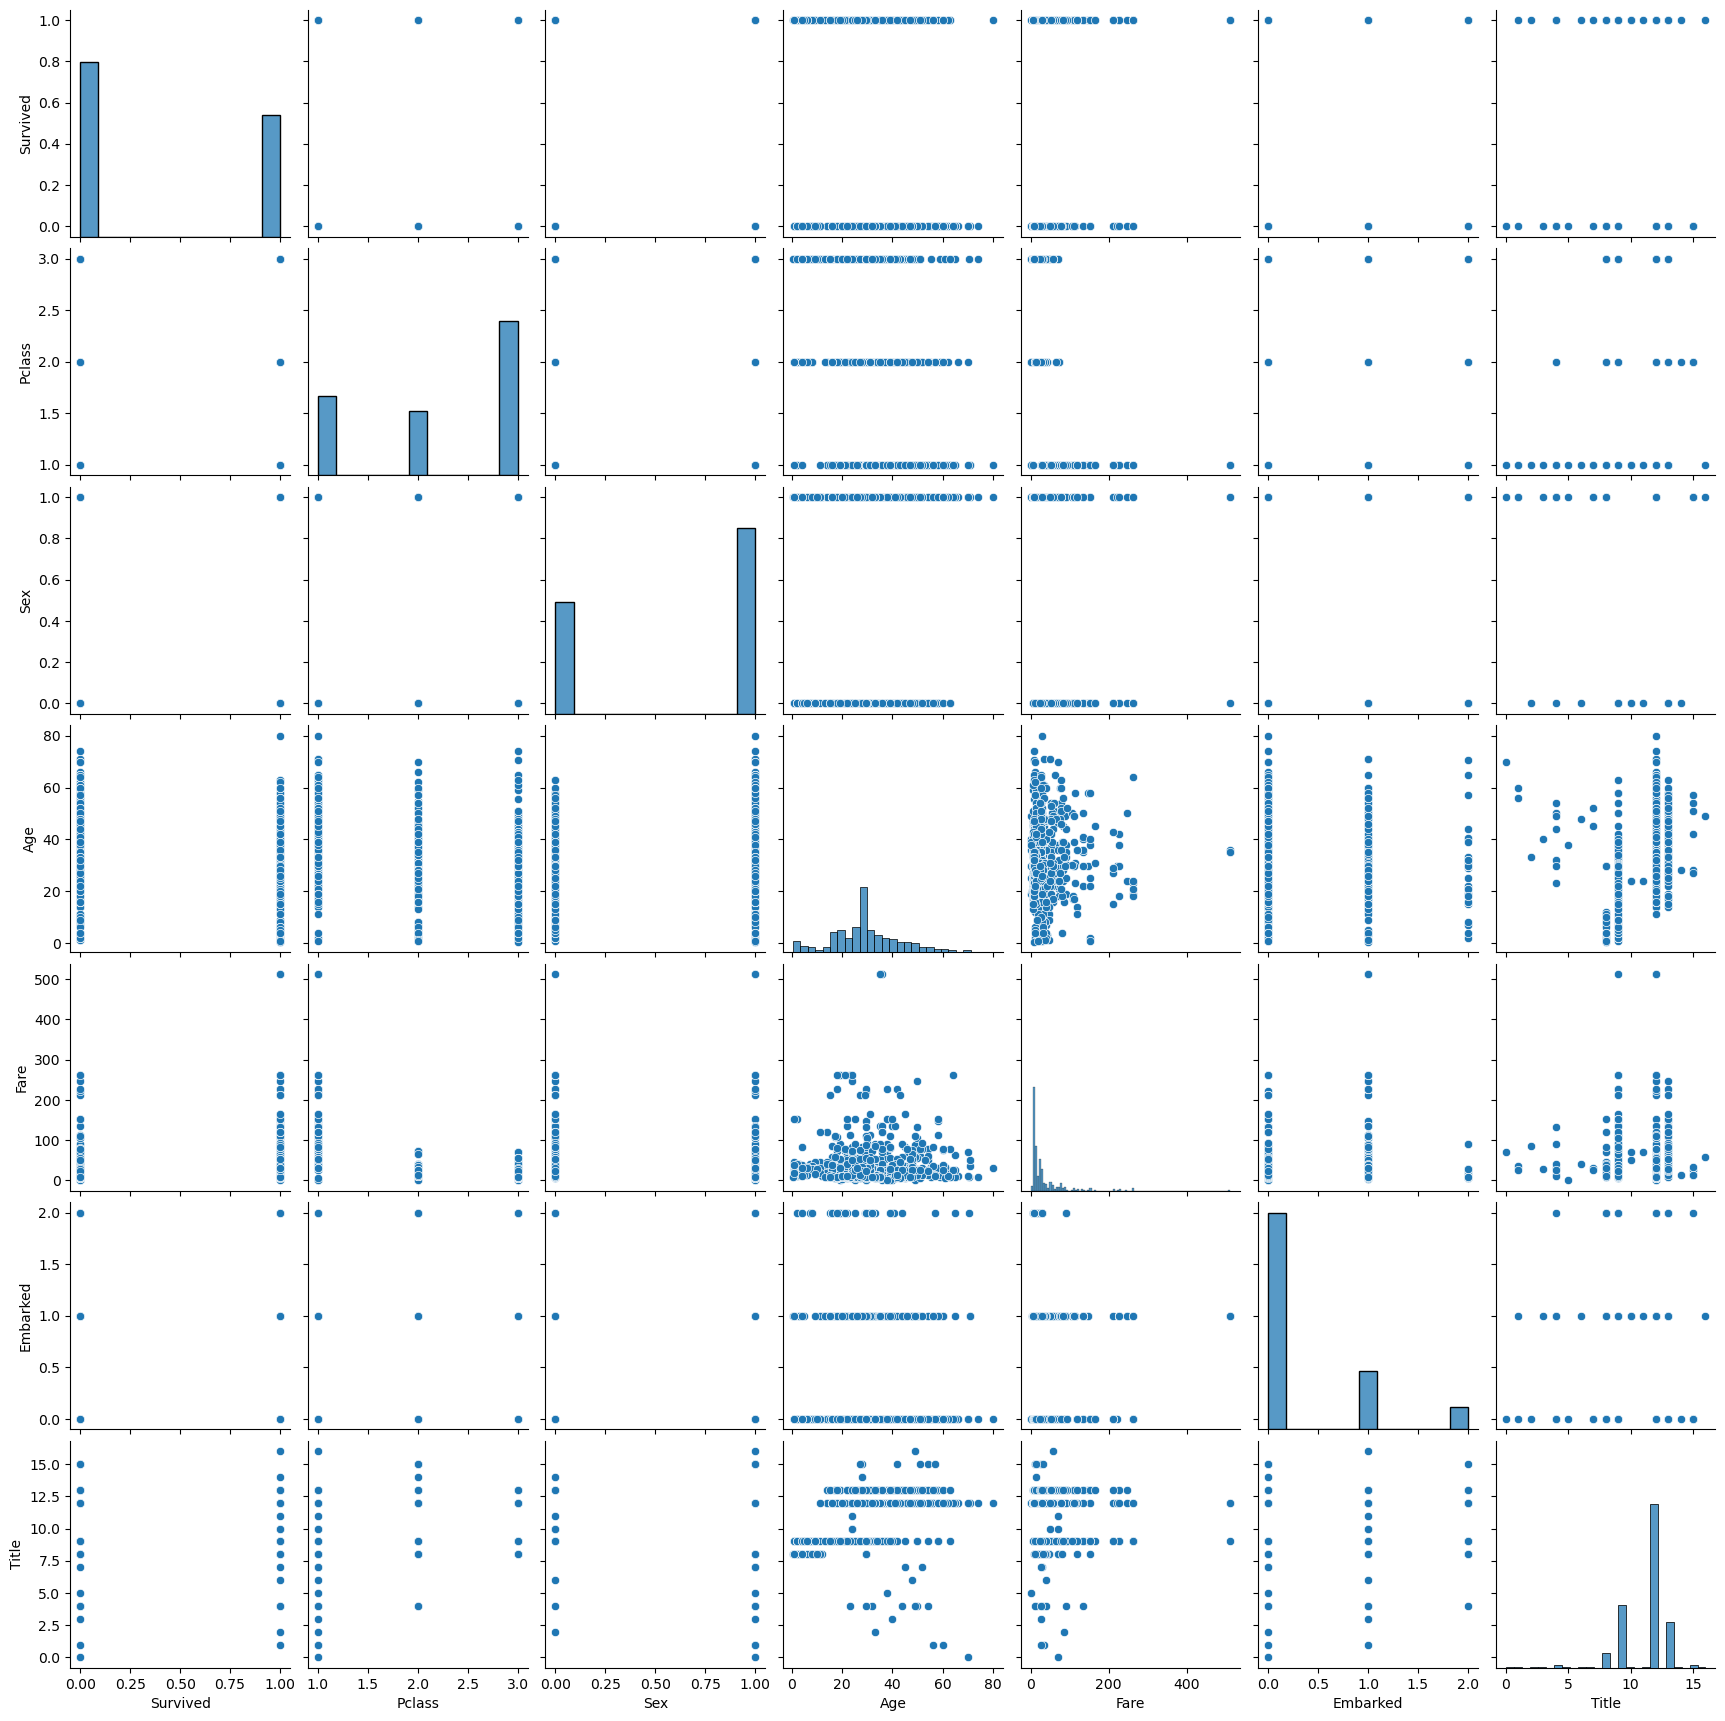

In [33]:
sns.pairplot(data)

# Check Outlires

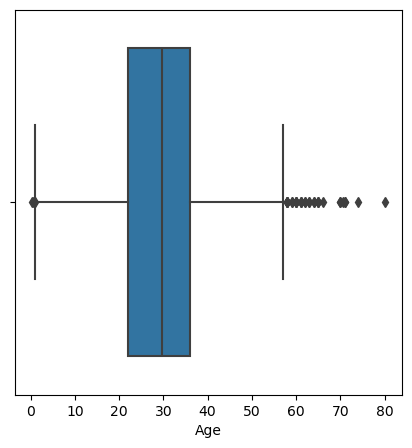

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data['Age'])
plt.show()

In [29]:
def remove_outlires(data,cols):
    for col in cols:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR= Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        data=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
    return data
cols=['Age']
data=remove_outlires(data,cols)

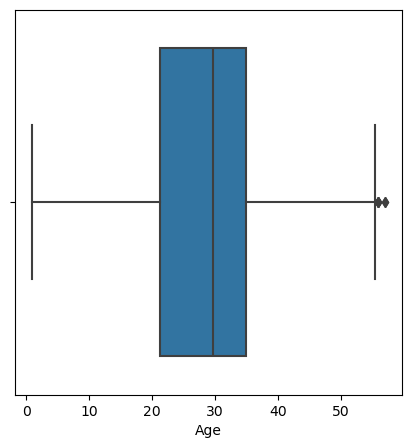

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(x=data['Age'])
plt.show()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  754 non-null    int64  
 1   Pclass    754 non-null    int64  
 2   Sex       754 non-null    int64  
 3   Age       754 non-null    float64
 4   Fare      754 non-null    float64
 5   Embarked  754 non-null    int64  
 6   Title     754 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 44.2 KB


# Split the data

In [32]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy='minority', k_neighbors=5)
# apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)
# print the new class distribution
print('Resampled class distribution:', Counter(y_resampled))

Resampled class distribution: Counter({0: 444, 1: 444})


In [34]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=33,shuffle=True)

In [35]:
from sklearn.preprocessing import StandardScaler
scler=StandardScaler()
x_train=scler.fit_transform(x_train)
x_test=scler.transform(x_test)

# Build Model

In [55]:
modelName = ['Logistic Regression','Decision Tree' , 'Random Forest' , 'KNN','SVC']
model = [LogisticRegression(solver='saga',C=1,max_iter=100,multi_class='multinomial',tol=0.001),DecisionTreeClassifier(), RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=44,max_features= 'auto') , KNeighborsClassifier(n_neighbors=4) , SVC(C=0.3,kernel='linear',gamma=0.1)]

In [56]:
def train_Model(modelName,model,x_train,x_test,y_train,y_test):
    result={}
    for name , model in zip(modelName,model):
        model.fit(x_train,y_train)
        train_score=model.score(x_train,y_train)
        y_pred = model.predict(x_test)
        ac=accuracy_score(y_pred,y_test)
        precision=precision_score(y_pred,y_test,average="micro")
        recall=recall_score(y_pred,y_test,average='micro')
        f1score=f1_score(y_pred,y_test,average='micro')
        result[name]= [train_score,ac,precision,recall,f1score]
    return result

In [57]:
result = train_Model(modelName,model,x_train,x_test,y_train,y_test)
result = pd.DataFrame(result,index=['train_score','Accuracy','precision','recall','f1score'])
result

,Logistic Regression,Decision Tree,Random Forest,KNN,SVC
train_score,0.783099,0.984507,0.976056,0.854930,0.785915
Accuracy,0.803371,0.780899,0.837079,0.803371,0.792135
precision,0.803371,0.780899,0.837079,0.803371,0.792135
recall,0.803371,0.780899,0.837079,0.803371,0.792135
f1score,0.803371,0.780899,0.837079,0.803371,0.792135


## with cross validation

In [53]:
from sklearn.model_selection import cross_val_score
modelrandom = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=44,max_features= 'auto')
socre =cross_val_score(modelrandom,X,y ,cv=5)
socre

array([0.74834437, 0.74834437, 0.79470199, 0.7615894 , 0.8       ])

In [54]:
socre.mean()

0.7705960264900662

# Build Bagging

In [58]:
from sklearn.ensemble import BaggingClassifier
svmodel= SVC(random_state=42,C=0.3,kernel='linear',gamma=0.1)
dtmodel= DecisionTreeClassifier(random_state=42)
lrmodel= LogisticRegression()
knmodel= KNeighborsClassifier(n_neighbors=5)

bagg_SV = BaggingClassifier( base_estimator=svmodel ,bootstrap=True,n_estimators=100)
bagg_DS = BaggingClassifier( base_estimator=dtmodel ,bootstrap=True,n_estimators=5)
bagg_KN = BaggingClassifier( base_estimator=knmodel ,bootstrap=True,n_estimators=20,random_state=42)
bagg_LR = BaggingClassifier( base_estimator=lrmodel ,bootstrap=True,n_estimators=100)

In [59]:
BaggModelName = ['Bagg Logistic Regression','Bagg Decision Tree' , 'Bagg KNN','Bagg SVC']
BaggModel = [bagg_LR,bagg_DS, bagg_KN, bagg_SV]


In [60]:
result = train_Model(BaggModelName,BaggModel,x_train,x_test,y_train,y_test)
result = pd.DataFrame(result,index=['train_score','Accuracy','precision','recall','f1score'])
result

,Bagg Logistic Regression,Bagg Decision Tree,Bagg KNN,Bagg SVC
train_score,0.778873,0.957746,0.860563,0.785915
Accuracy,0.797753,0.808989,0.837079,0.792135
precision,0.797753,0.808989,0.837079,0.792135
recall,0.797753,0.808989,0.837079,0.792135
f1score,0.797753,0.808989,0.837079,0.792135


# NN
    

In [62]:
x_train.shape

(710, 6)

In [70]:
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu",input_shape=(6,)),
        layers.Dropout(0.4),
        layers.Dense(128, activation="relu"),
        # layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(64, activation="relu"),
        # layers.Dropout(0.4),
        layers.Dense(32, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(8, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,129 (63.00 KB)

 Trainable params: 15,793 (61.69 KB)

 Non-trainable params: 336 (1.31 KB)

In [71]:
batch_size = 64
epochs = 100

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step - accuracy: 0.4642 - loss: 0.7999 - val_accuracy: 0.5070 - val_loss: 0.6948
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6019 - loss: 0.6648 - val_accuracy: 0.5775 - val_loss: 0.6860
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6611 - loss: 0.6236 - val_accuracy: 0.6338 - val_loss: 0.6807
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6923 - loss: 0.5794 - val_accuracy: 0.6479 - val_loss: 0.6760
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7250 - loss: 0.5571 - val_accuracy: 0.6620 - val_loss: 0.6687
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7424 - loss: 0.5416 - val_accuracy: 0.6761 - val_loss: 0.6624
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7246 - loss: 0.5563 - val_accuracy: 0.6761 - val_loss: 0.6541
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7567 - loss: 0.5319 - val_accuracy: 

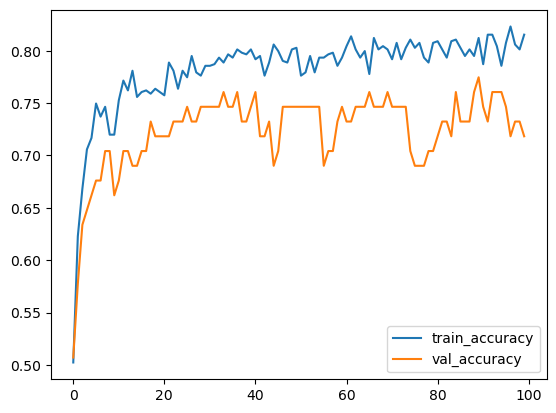

In [72]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

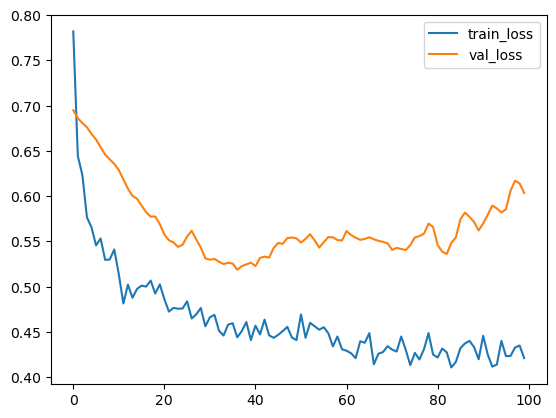

In [73]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()